In [1]:
import torch
import sklearn
import os
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import requests
from pathlib import Path
import xml.etree.ElementTree as ET
from PIL import Image

In [2]:
from models.UVixLSTM_Att import UVixLSTM_Att
sample_input = torch.randn(8, 3, 256, 256)  
model = UVixLSTM_Att(class_num=1, img_dim = 256, in_channels=3)

output = model(sample_input)

print(f'Output shape: {output.shape}')

/mnt/data2/sohum/miniconda3/envs/cmu_cell_seg/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Output shape: torch.Size([8, 1, 256, 256])


In [3]:
import numpy as np

# Load the data dictionary
data = np.load('./Data/all_data.npy', allow_pickle=True).item()

# Print the length of each key's value
for key, value in data.items():
    if isinstance(value, list):
        print(f"Key: {key}, Length: {len(value)}")
    else:
        print(f"Key: {key}, Value: Not a list (type: {type(value)})")


Key: original_image, Length: 60
Key: mask, Length: 60
Key: aug_images, Length: 360
Key: aug_masks, Length: 360
Key: patched_orig_images, Length: 16
Key: patched_orig_masks, Length: 16
Key: patched_aug_images, Length: 96
Key: patched_aug_masks, Length: 96
Key: train_patched_images, Length: 84
Key: train_patched_masks, Length: 84
Key: val_patched_images, Length: 20
Key: val_patched_masks, Length: 20
Key: test_patched_images, Length: 8
Key: test_patched_masks, Length: 8


In [120]:
import rasterio
import numpy as np
import imageio

# Open the image file
file = 'patient_004_node_3.tif'
with rasterio.open(f'/mnt/data2/sohum/datasets/camelyon17/images/{file}') as src:
    # Define the window to read (e.g., top-left 1000x1000 pixels)
    window = rasterio.windows.Window(0, 0, 2000, 2000)
    
    # Read the window data
    image_portion_np = src.read(window=window)
    
    # Check the shape
    print(f"Extracted portion shape: {image_portion_np.shape}")

    # Remove the batch dimension if it exists
    if image_portion_np.ndim == 3 and image_portion_np.shape[0] == 3:
        # Rearrange dimensions from (channels, height, width) to (height, width, channels)
        image_portion_np = np.transpose(image_portion_np, (1, 2, 0))

    # Ensure the image is in a valid format for saving
    if image_portion_np.ndim == 3 and image_portion_np.shape[2] in [1, 3]:
        # Convert single channel (grayscale) to 2D if needed
        if image_portion_np.shape[2] == 1:
            image_portion_np = image_portion_np.squeeze(axis=2)
        
        # Save the image
        output_path = f'/mnt/data2/sohum/Cell_Att_UVixLSTM/Data/{file}'
        # Ensure the image is in uint8 format for saving
        if image_portion_np.dtype != np.uint8:
            image_portion_np = np.clip(image_portion_np, 0, 255).astype(np.uint8)
        imageio.imwrite(output_path, image_portion_np)
    else:
        raise ValueError("Extracted portion must be 2D (grayscale) or 3D with 3 (RGB) or 4 (RGBA) channels.")


Extracted portion shape: (3, 2000, 2000)


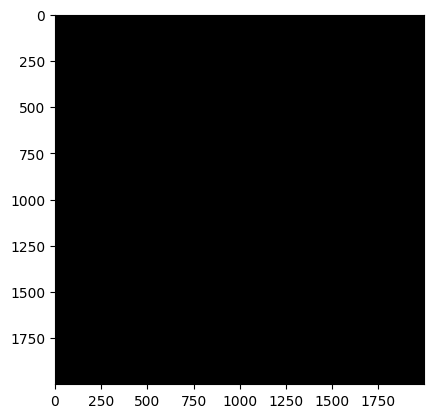

In [121]:
import dask_image.imread

image = dask_image.imread.imread(f'/mnt/data2/sohum/Cell_Att_UVixLSTM/Data/{file}')
image = image.squeeze()
plt.imshow(image)



In [2]:
sum([4, 3])

7